# **TODS** (Automated Time Series Outlier Detection System)

## Introduction Summary

TODS is a full-stack automated machine learning system for outlier detection on multivariate time-series data. TODS provides exhaustive modules for building machine learning-based outlier detection systems, including: data processing, time series processing, feature analysis (extraction), detection algorithms, and reinforcement module. The functionalities provided via these modules include data preprocessing for general purposes, time series data smoothing/transformation, extracting features from time/frequency domains, various detection algorithms, and involving human expertise to calibrate the system. Three common outlier detection scenarios on time-series data can be performed: point-wise detection (time points as outliers), pattern-wise detection (subsequences as outliers), and system-wise detection (sets of time series as outliers), and a wide-range of corresponding algorithms are provided in TODS. This package is developed by DATA Lab @ Texas A&M University.

## Packages

**PLEASE READ**: First run the cell below, DO NOT click "RUN ALL".








In [ ]:
import warnings
warnings.filterwarnings("ignore")

!pip install -e git+https://github.com/datamllab/tods.git@dev#egg=tods
exit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining tods from git+https://github.com/datamllab/tods.git@dev#egg=tods
  Cloning https://github.com/datamllab/tods.git (to revision dev) to ./src/tods
  Running command git clone -q https://github.com/datamllab/tods.git /content/src/tods
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
     |████████████████████████████████| 313 kB 3.5 MB/s 
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 15.7 MB 8.8 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 8.7 MB 44.3 MB/s 
     |████████████████████████████████| 394.7 MB 15 kB/s 
     |████████████████████████████████| 170 kB 41.9 MB/s 
     |████████████████████████████████| 137 kB 57.6 MB/s 
     |████████████████████████████████| 4.7 

**PLEASE READ**: *After running the previous cell, we have installed TODS and restarted the runtime to finish the installation process.*

Now, you can click on this cell, and simply click "Runtime" -> "Run After" to run the remaining sections.

## Imports

In [ ]:
import sys
import argparse
import os
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from d3m import index
from d3m.metadata.base import ArgumentType
from d3m.metadata.pipeline import Pipeline, PrimitiveStep
from axolotl.backend.simple import SimpleRunner
from tods import generate_dataset, generate_problem
from tods.searcher import BruteForceSearch
from tods import generate_dataset, load_pipeline, evaluate_pipeline
from tods.sk_interface.detection_algorithm.DeepLog_skinterface import DeepLogSKI
from tods.sk_interface.detection_algorithm.Telemanom_skinterface import TelemanomSKI


ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


## Dataset

### UCR Dataset

In [ ]:
data_UCR = np.loadtxt("src/tods/datasets/anomaly/raw_data/500_UCR_Anomaly_robotDOG1_10000_19280_19360.txt")

In [ ]:
print("shape:", data_UCR.shape)
print("datatype of data:",data_UCR.dtype)
print("First 5 rows:\n", data_UCR[:5])

shape: (20000,)
datatype of data: float64
First 5 rows:
 [0.145299 0.128205 0.094017 0.076923 0.111111]


In [ ]:
X_train = np.expand_dims(data_UCR[:10000], axis=1)
X_test = np.expand_dims(data_UCR[10000:], axis=1)

In [ ]:
print("First 5 rows train:\n", X_train[:5])
print("First 5 rows test:\n", X_test[:5])

First 5 rows train:
 [[0.145299]
 [0.128205]
 [0.094017]
 [0.076923]
 [0.111111]]
First 5 rows test:
 [[0.076923]
 [0.076923]
 [0.076923]
 [0.094017]
 [0.145299]]


### Yahoo Dataset

In [ ]:
data_yahoo = pd.read_csv('src/tods/datasets/anomaly/raw_data/yahoo_sub_5.csv')

In [ ]:
print("shape:", data_yahoo.shape)
print("First 5 rows:\n", data_yahoo[:5])

shape: (1400, 7)
First 5 rows:
    timestamp  value_0   value_1   value_2  value_3  value_4  anomaly
0          1    12183  0.000000  3.716667        5     2109        0
1          2    12715  0.091758  3.610833       60     3229        0
2          3    12736  0.172297  3.481389       88     3637        0
3          4    12716  0.226219  3.380278       84     1982        0
4          5    12739  0.176358  3.193333      111     2751        0


## SK Example 1: DeepLog

In [ ]:
transformer = DeepLogSKI()
transformer.fit(X_train)
prediction_labels_train = transformer.predict(X_train)
prediction_labels_test = transformer.predict(X_test)
prediction_score = transformer.predict_score(X_test)

Epoch 1/10
282/282 [==============================] - 8s 11ms/step - loss: 0.5767 - val_loss: 0.2707
Epoch 2/10
282/282 [==============================] - 2s 7ms/step - loss: 0.3391 - val_loss: 0.2591
Epoch 3/10
282/282 [==============================] - 2s 8ms/step - loss: 0.3358 - val_loss: 0.2536
Epoch 4/10
282/282 [==============================] - 2s 6ms/step - loss: 0.3466 - val_loss: 0.2758
Epoch 5/10
282/282 [==============================] - 2s 7ms/step - loss: 0.3375 - val_loss: 0.2861
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 0.3456 - val_loss: 0.2515
Epoch 7/10
282/282 [==============================] - 2s 8ms/step - loss: 0.3581 - val_loss: 0.2800
Epoch 8/10
282/282 [==============================] - 2s 6ms/step - loss: 0.3578 - val_loss: 0.2575
Epoch 9/10
282/282 [==============================] - 1s 4ms/step - loss: 0.3446 - val_loss: 0.2721
Epoch 10/10
282/282 [==============================] - 2s 7ms/step - loss: 0.3115 - val_loss: 0.268

In [ ]:
print("Prediction Labels\n", prediction_labels_test)
print("Prediction Score\n", prediction_score)

Prediction Labels
 [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Prediction Score
 [[0.        ]
 [0.33220587]
 [0.33220587]
 ...
 [0.76094826]
 [0.45291543]
 [0.16539938]]


In [ ]:
y_true = prediction_labels_train
y_pred = prediction_labels_test
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
f1_scores = 2*recall*precision/(recall+precision)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_true, y_pred))

Accuracy Score:  0.9049


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9004
           1       0.53      0.38      0.44       996

    accuracy                           0.90     10000
   macro avg       0.73      0.67      0.70     10000
weighted avg       0.89      0.90      0.90     10000



In [ ]:
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  1
Best F1-Score:  0.4441846873173582


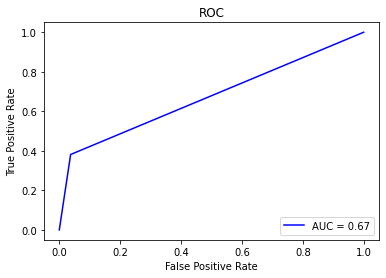

In [ ]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SK Example 2: Telemanom

In [ ]:
transformer = TelemanomSKI(l_s= 2, n_predictions= 1)
transformer.fit(X_train)
prediction_labels_train = transformer.predict(X_train)
prediction_labels_test = transformer.predict(X_test)
prediction_score = transformer.predict_score(X_test)

125/125 [==============================] - 5s 11ms/step - loss: 0.0179 - val_loss: 0.0046


In [ ]:
print("Prediction Labels\n", prediction_labels_test)
print("Prediction Score\n", prediction_score)

Prediction Labels
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Prediction Score
 [[0.08460115]
 [0.07602973]
 [0.05638299]
 ...
 [0.05913635]
 [0.0596398 ]
 [0.06001454]]


In [ ]:
y_true = prediction_labels_train
y_pred = prediction_labels_test
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
f1_scores = 2*recall*precision/(recall+precision)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_true, y_pred))

Accuracy Score:  0.19015704711413425


In [ ]:
confusion_matrix(y_true, y_pred)

array([[1036, 7961],
       [ 135,  865]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.12      0.20      8997
           1       0.10      0.86      0.18      1000

    accuracy                           0.19      9997
   macro avg       0.49      0.49      0.19      9997
weighted avg       0.81      0.19      0.20      9997



In [ ]:
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  0
Best F1-Score:  0.18186778212239701


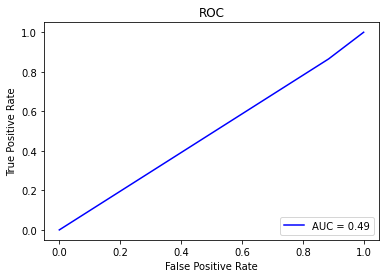

In [ ]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Pipline Example: AutoEncoder

### Build Pipeline

In [ ]:
# Creating pipeline
pipeline_description = Pipeline()
pipeline_description.add_input(name='inputs')

'inputs.0'

In [ ]:
# Step 0: dataset_to_dataframe
step_0 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.dataset_to_dataframe'))
step_0.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='inputs.0')
step_0.add_output('produce')
pipeline_description.add_step(step_0)

In [ ]:
# Step 1: column_parser
step_1 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.column_parser'))
step_1.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.0.produce')
step_1.add_output('produce')
pipeline_description.add_step(step_1)

In [ ]:
# Step 2: extract_columns_by_semantic_types(attributes)
step_2 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.extract_columns_by_semantic_types'))
step_2.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.1.produce')
step_2.add_output('produce')
step_2.add_hyperparameter(name='semantic_types', argument_type=ArgumentType.VALUE,
							  data=['https://metadata.datadrivendiscovery.org/types/Attribute'])
pipeline_description.add_step(step_2)

In [ ]:
# Step 3: extract_columns_by_semantic_types(targets)
step_3 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.extract_columns_by_semantic_types'))
step_3.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.0.produce')
step_3.add_output('produce')
step_3.add_hyperparameter(name='semantic_types', argument_type=ArgumentType.VALUE,
							data=['https://metadata.datadrivendiscovery.org/types/TrueTarget'])
pipeline_description.add_step(step_3)

In [ ]:
attributes = 'steps.2.produce'
targets = 'steps.3.produce'

In [ ]:
# Step 4: processing
step_4 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.feature_analysis.statistical_maximum'))
step_4.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference=attributes)
step_4.add_output('produce')
pipeline_description.add_step(step_4)

In [ ]:
# Step 5: algorithm`
step_5 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.detection_algorithm.pyod_ae'))
step_5.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.4.produce')
step_5.add_output('produce')
pipeline_description.add_step(step_5)

In [ ]:
# Step 6: Predictions
step_6 = PrimitiveStep(primitive=index.get_primitive('d3m.primitives.tods.data_processing.construct_predictions'))
step_6.add_argument(name='inputs', argument_type=ArgumentType.CONTAINER, data_reference='steps.5.produce')
step_6.add_argument(name='reference', argument_type=ArgumentType.CONTAINER, data_reference='steps.1.produce')
step_6.add_output('produce')
pipeline_description.add_step(step_6)

In [ ]:
# Final Output
pipeline_description.add_output(name='output predictions', data_reference='steps.6.produce')

'outputs.0'

In [ ]:
# Output to json
data = pipeline_description.to_json()
with open('autoencoder_pipeline.json', 'w') as f:
    f.write(data)
    print(data)

{"id": "877ca468-fc5a-4767-83c8-219175d1b661", "schema": "https://metadata.datadrivendiscovery.org/schemas/v0/pipeline.json", "created": "2022-09-21T02:25:50.494694Z", "inputs": [{"name": "inputs"}], "outputs": [{"data": "steps.6.produce", "name": "output predictions"}], "steps": [{"type": "PRIMITIVE", "primitive": {"id": "c78138d9-9377-31dc-aee8-83d9df049c60", "version": "0.3.0", "python_path": "d3m.primitives.tods.data_processing.dataset_to_dataframe", "name": "Extract a DataFrame from a Dataset"}, "arguments": {"inputs": {"type": "CONTAINER", "data": "inputs.0"}}, "outputs": [{"id": "produce"}]}, {"type": "PRIMITIVE", "primitive": {"id": "81235c29-aeb9-3828-911a-1b25319b6998", "version": "0.3.0", "python_path": "d3m.primitives.tods.data_processing.column_parser", "name": "Parses strings into their types"}, "arguments": {"inputs": {"type": "CONTAINER", "data": "steps.0.produce"}}, "outputs": [{"id": "produce"}]}, {"type": "PRIMITIVE", "primitive": {"id": "a996cd89-ddf0-367f-8e7f-8c01

### Run Pipeline

In [ ]:
this_path = os.path.dirname(os.path.abspath("__file__"))
default_data_path = os.path.join(this_path, 'src/tods/datasets/anomaly/raw_data/yahoo_sub_5.csv')

In [ ]:
parser = argparse.ArgumentParser(description='Arguments for running predefined pipelin.')
parser.add_argument('--table_path', type=str, default=default_data_path,
                    help='Input the path of the input data table')
parser.add_argument('--target_index', type=int, default=6,
                    help='Index of the ground truth (for evaluation)')
parser.add_argument('--metric',type=str, default='F1_MACRO',
                    help='Evaluation Metric (F1, F1_MACRO)')
parser.add_argument('--pipeline_path',
                    default=os.path.join(this_path, 'autoencoder_pipeline.json'),
                    help='Input the path of the pre-built pipeline description')

_StoreAction(option_strings=['--pipeline_path'], dest='pipeline_path', nargs=None, const=None, default='/content/autoencoder_pipeline.json', type=None, choices=None, help='Input the path of the pre-built pipeline description', metavar=None)

In [ ]:
args, unknown = parser.parse_known_args()
table_path = args.table_path
target_index = args.target_index # what column is the target
pipeline_path = args.pipeline_path
metric = args.metric # F1 on both label 0 and 1

In [ ]:
# Read data and generate dataset
df = pd.read_csv(table_path)
dataset = generate_dataset(df, target_index)

In [ ]:
# Load the default pipeline
pipeline = load_pipeline(pipeline_path)

In [ ]:
# Run the pipeline
pipeline_result = evaluate_pipeline(dataset, pipeline, metric)
print(pipeline_result)

Dataset(id='df3208bd-8ca0-4684-9fd1-173d6b2d06b5', name='df3208bd-8ca0-4684-9fd1-173d6b2d06b5') <d3m.metadata.pipeline.Pipeline object at 0x7fbdd90a1290> F1_MACRO <d3m.metadata.pipeline.Pipeline object at 0x7fbd6240b810>


Stack (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._call

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
_________________________________________________________________
dropout_4 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

Stack (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._call

Train on 1260 samples, validate on 140 samples
Epoch 1/20
1260/1260 [==============================] - 0s 294us/sample - loss: 1.8660 - val_loss: 1.8624
Epoch 2/20
1260/1260 [==============================] - 0s 57us/sample - loss: 1.6543 - val_loss: 1.7376
Epoch 3/20
  32/1260 [..............................] - ETA: 0s - loss: 1.2131

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 0s 48us/sample - loss: 1.5749 - val_loss: 1.6481
Epoch 4/20
1260/1260 [==============================] - 0s 62us/sample - loss: 1.4853 - val_loss: 1.5835
Epoch 5/20
1260/1260 [==============================] - 0s 59us/sample - loss: 1.4066 - val_loss: 1.5359
Epoch 6/20
1260/1260 [==============================] - 0s 54us/sample - loss: 1.4071 - val_loss: 1.4916
Epoch 7/20
1260/1260 [==============================] - 0s 54us/sample - loss: 1.3339 - val_loss: 1.4514
Epoch 8/20
1260/1260 [==============================] - 0s 59us/sample - loss: 1.3102 - val_loss: 1.4196
Epoch 9/20
1260/1260 [==============================] - 0s 52us/sample - loss: 1.2793 - val_loss: 1.3893
Epoch 10/20
1260/1260 [==============================] - 0s 55us/sample - loss: 1.2450 - val_loss: 1.3612
Epoch 11/20
1260/1260 [==============================] - 0s 58us/sample - loss: 1.2287 - val_loss: 1.3334
Epoch 12/20
1260/1260 [==============================] - 0s 60us

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


{'method_called': 'evaluate',
 'outputs': "[{'outputs.0':      d3mIndex  anomaly"
            '0           0        0'
            '1           1        0'
            '2           2        0'
            '3           3        0'
            '4           4        0'
            '...       ...      ...'
            '1395     1395        0'
            '1396     1396        0'
            '1397     1397        1'
            '1398     1398        1'
            '1399     1399        0'
            ''
            "[1400 rows x 2 columns]}, {'outputs.0':      d3mIndex  anomaly"
            '0           0        0'
            '1           1        0'
            '2           2        0'
            '3           3        0'
            '4           4        0'
            '...       ...      ...'
            '1395     1395        0'
            '1396     1396        0'
            '1397     1397        1'
            '1398     1398        1'
            '1399     1399        0'
            

## Searcher Example:

In [ ]:
table_path = 'src/tods/datasets/anomaly/raw_data/yahoo_sub_5.csv'
target_index = 6 # column of the target label
time_limit = 30 # How many seconds you wanna search

In [ ]:
metric = 'F1_MACRO' # F1 on both label 0 and 1

In [ ]:
# Read data and generate dataset and problem
df = pd.read_csv(table_path)
dataset = generate_dataset(df, target_index=target_index)
problem_description = generate_problem(dataset, metric)

In [ ]:
# Start backend
backend = SimpleRunner(random_seed=0)

In [ ]:
# Start search algorithm
search = BruteForceSearch(problem_description=problem_description,
                          backend=backend)

In [ ]:
# Find the best pipeline
best_runtime, best_pipeline_result = search.search_fit(input_data=[dataset], time_limit=time_limit)
best_pipeline = best_runtime.pipeline
best_output = best_pipeline_result.output

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_7 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_9 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 0s 56us/sample - loss: 1.3426 - val_loss: 1.0502
Epoch 4/20
1260/1260 [==============================] - 0s 49us/sample - loss: 1.2507 - val_loss: 0.9794
Epoch 5/20
1260/1260 [==============================] - 0s 55us/sample - loss: 1.1810 - val_loss: 0.9228
Epoch 6/20
1260/1260 [==============================] - 0s 62us/sample - loss: 1.1196 - val_loss: 0.8748
Epoch 7/20
1260/1260 [==============================] - 0s 54us/sample - loss: 1.0819 - val_loss: 0.8358
Epoch 8/20
1260/1260 [==============================] - 0s 51us/sample - loss: 1.0382 - val_loss: 0.8026
Epoch 9/20
1260/1260 [==============================] - 0s 56us/sample - loss: 0.9943 - val_loss: 0.7752
Epoch 10/20
1260/1260 [==============================] - 0s 54us/sample - loss: 0.9724 - val_loss: 0.7515
Epoch 11/20
1260/1260 [==============================] - 0s 56us/sample - loss: 0.9443 - val_loss: 0.7311
Epoch 12/20
1260/1260 [==============================] - 0s 58us

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
Traceback (most recent call last):
  File "/content/src/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_12 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_13 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_14 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 0s 61us/sample - loss: 1.4321 - val_loss: 1.0859
Epoch 4/20
1260/1260 [==============================] - 0s 54us/sample - loss: 1.3271 - val_loss: 1.0135
Epoch 5/20
1260/1260 [==============================] - 0s 55us/sample - loss: 1.2531 - val_loss: 0.9555
Epoch 6/20
1260/1260 [==============================] - 0s 61us/sample - loss: 1.1945 - val_loss: 0.9104
Epoch 7/20
1260/1260 [==============================] - 0s 58us/sample - loss: 1.1594 - val_loss: 0.8737
Epoch 8/20
1260/1260 [==============================] - 0s 69us/sample - loss: 1.1131 - val_loss: 0.8431
Epoch 9/20
1260/1260 [==============================] - 0s 57us/sample - loss: 1.0782 - val_loss: 0.8172
Epoch 10/20
1260/1260 [==============================] - 0s 67us/sample - loss: 1.0537 - val_loss: 0.7947
Epoch 11/20
1260/1260 [==============================] - 0s 59us/sample - loss: 1.0302 - val_loss: 0.7750
Epoch 12/20
1260/1260 [==============================] - 0s 52us

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
Traceback (most recent call last):
  File "/content/src/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_17 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_18 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_19 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 0s 67us/sample - loss: 1.5419 - val_loss: 1.7698
Epoch 3/20
1260/1260 [==============================] - 0s 58us/sample - loss: 1.3736 - val_loss: 1.6139
Epoch 4/20
1260/1260 [==============================] - 0s 62us/sample - loss: 1.2414 - val_loss: 1.5053
Epoch 5/20
1260/1260 [==============================] - 0s 53us/sample - loss: 1.1918 - val_loss: 1.4094
Epoch 6/20
1260/1260 [==============================] - 0s 67us/sample - loss: 1.1041 - val_loss: 1.3407
Epoch 7/20
1260/1260 [==============================] - 0s 56us/sample - loss: 1.0701 - val_loss: 1.2829
Epoch 8/20
1260/1260 [==============================] - 0s 57us/sample - loss: 1.0185 - val_loss: 1.2348
Epoch 9/20
1260/1260 [==============================] - 0s 64us/sample - loss: 0.9811 - val_loss: 1.1970
Epoch 10/20
1260/1260 [==============================] - 0s 59us/sample - loss: 0.9615 - val_loss: 1.1620
Epoch 11/20
1260/1260 [==============================] - 0s 62us/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
Traceback (most recent call last):
  File "/content/src/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_22 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_23 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_24 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 4)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 0s 59us/sample - loss: 1.1099 - val_loss: 1.9770
Epoch 3/20
1260/1260 [==============================] - 0s 56us/sample - loss: 1.0542 - val_loss: 1.9017
Epoch 4/20
1260/1260 [==============================] - 0s 61us/sample - loss: 1.0134 - val_loss: 1.8506
Epoch 5/20
1260/1260 [==============================] - 0s 56us/sample - loss: 0.9860 - val_loss: 1.8001
Epoch 6/20
1260/1260 [==============================] - 0s 68us/sample - loss: 0.9596 - val_loss: 1.7603
Epoch 7/20
1260/1260 [==============================] - 0s 61us/sample - loss: 0.9351 - val_loss: 1.7329
Epoch 8/20
1260/1260 [==============================] - 0s 62us/sample - loss: 0.9152 - val_loss: 1.6750
Epoch 9/20
1260/1260 [==============================] - 0s 68us/sample - loss: 0.8996 - val_loss: 1.6477
Epoch 10/20
1260/1260 [==============================] - 0s 61us/sample - loss: 0.8811 - val_loss: 1.6244
Epoch 11/20
1260/1260 [==============================] - 0s 70us/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
Traceback (most recent call last):
  File "/content/src/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_27 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_28 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_29 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/20
1260/1260 [==============================] - 0s 67us/sample - loss: 1.3641 - val_loss: 1.4564
Epoch 3/20
1260/1260 [==============================] - 0s 59us/sample - loss: 1.2423 - val_loss: 1.3611
Epoch 4/20
1260/1260 [==============================] - 0s 56us/sample - loss: 1.1618 - val_loss: 1.2846
Epoch 5/20
1260/1260 [==============================] - 0s 60us/sample - loss: 1.1010 - val_loss: 1.2276
Epoch 6/20
1260/1260 [==============================] - 0s 65us/sample - loss: 1.0535 - val_loss: 1.1789
Epoch 7/20
1260/1260 [==============================] - 0s 62us/sample - loss: 1.0071 - val_loss: 1.1367
Epoch 8/20
1260/1260 [==============================] - 0s 65us/sample - loss: 0.9731 - val_loss: 1.0992
Epoch 9/20
1260/1260 [==============================] - 0s 60us/sample - loss: 0.9399 - val_loss: 1.0665
Epoch 10/20
1260/1260 [==============================] - 0s 64us/sample - loss: 0.9133 - val_loss: 1.0377
Epoch 11/20
1260/1260 [==============================]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
Traceback (most recent call last):
  File "/content/src/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_32 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_33 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_34 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_41 (Dense)             (None, 4)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 1s 717us/sample - loss: 1.7938 - val_loss: 1.9949
Epoch 2/20
1260/1260 [==============================] - 0s 59us/sample - loss: 1.5309 - val_loss: 1.8318
Epoch 3/20
1260/1260 [==============================] - 0s 58us/sample - loss: 1.3410 - val_loss: 1.7228
Epoch 4/20
1260/1260 [==============================] - 0s 71us/sample - loss: 1.2392 - val_loss: 1.6411
Epoch 5/20
1260/1260 [==============================] - 0s 76us/sample - loss: 1.1627 - val_loss: 1.5830
Epoch 6/20
1260/1260 [==============================] - 0s 63us/sample - loss: 1.1054 - val_loss: 1.5261
Epoch 7/20
1260/1260 [==============================] - 0s 77us/sample - loss: 1.0525 - val_loss: 1.4851
Epoch 8/20
1260/1260 [==============================] - 0s 73us/sample - loss: 1.0376 - val_loss: 1.4471
Epoch 9/20
1260/1260 [==============================] - 0s 68us/sample - loss: 0.9971 - val_loss: 1.4179
Epoch 10/20
1260/1260 [==============================] - 0s 62us/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
Traceback (most recent call last):
  File "/content/src/tods/tods/searcher/brute_force_search.py", line 62, in _search
    for error in pipeline_result.error:
TypeError: 'NoneType' object is not iterable


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_37 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_38 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_39 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 4)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 1s 792us/sample - loss: 1.4859 - val_loss: 1.0971
Epoch 2/20
1260/1260 [==============================] - 0s 61us/sample - loss: 1.3447 - val_loss: 1.0030
Epoch 3/20
1260/1260 [==============================] - 0s 66us/sample - loss: 1.2593 - val_loss: 0.9408
Epoch 4/20
1260/1260 [==============================] - 0s 65us/sample - loss: 1.1785 - val_loss: 0.8937
Epoch 5/20
1260/1260 [==============================] - 0s 75us/sample - loss: 1.1357 - val_loss: 0.8586
Epoch 6/20
1260/1260 [==============================] - 0s 63us/sample - loss: 1.1008 - val_loss: 0.8296
Epoch 7/20
1260/1260 [==============================] - 0s 67us/sample - loss: 1.0599 - val_loss: 0.8045
Epoch 8/20
1260/1260 [==============================] - 0s 68us/sample - loss: 1.0387 - val_loss: 0.7832
Epoch 9/20
1260/1260 [==============================] - 0s 64us/sample - loss: 1.0068 - val_loss: 0.7647
Epoch 10/20
1260/1260 [==============================] - 0s 63us/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
# Evaluate the best pipeline
best_scores = search.evaluate(best_pipeline).scores

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_42 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_43 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 13        
_________________________________________________________________
dropout_44 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_53 (Dense)             (None, 4)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1260/1260 [==============================] - 1s 953us/sample - loss: 1.4433 - val_loss: 1.4167
Epoch 2/20
1260/1260 [==============================] - 0s 75us/sample - loss: 1.3026 - val_loss: 1.3340
Epoch 3/20
1260/1260 [==============================] - 0s 60us/sample - loss: 1.2371 - val_loss: 1.2749
Epoch 4/20
1260/1260 [==============================] - 0s 76us/sample - loss: 1.1622 - val_loss: 1.2287
Epoch 5/20
1260/1260 [==============================] - 0s 66us/sample - loss: 1.1203 - val_loss: 1.1850
Epoch 6/20
1260/1260 [==============================] - 0s 66us/sample - loss: 1.1118 - val_loss: 1.1528
Epoch 7/20
1260/1260 [==============================] - 0s 65us/sample - loss: 1.0757 - val_loss: 1.1263
Epoch 8/20
1260/1260 [==============================] - 0s 62us/sample - loss: 1.0155 - val_loss: 1.1003
Epoch 9/20
1260/1260 [==============================] - 0s 65us/sample - loss: 1.0234 - val_loss: 1.0769
Epoch 10/20
1260/1260 [==============================] - 0s 68us/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
print('Search History:')
for pipeline_result in search.history:
    print('-' * 52)
    print('Pipeline id:', pipeline_result.pipeline.id)
    print(pipeline_result.scores)

Search History:
----------------------------------------------------
Pipeline id: 43fe3788-3af8-47d8-9a7c-d1c2534c54e6
     metric     value  normalized  randomSeed  fold
0  F1_MACRO  0.708549    0.708549           0     0
----------------------------------------------------
Pipeline id: d01fc5fe-4865-46f9-8fc3-10adc15abf16
     metric     value  normalized  randomSeed  fold
0  F1_MACRO  0.616695    0.616695           0     0
----------------------------------------------------
Pipeline id: d15974fd-0a5b-4363-a366-ae0af5afce06
     metric    value  normalized  randomSeed  fold
0  F1_MACRO  0.55474     0.55474           0     0
----------------------------------------------------
Pipeline id: d2d82c40-0505-4924-978f-1d3a2c01f292
     metric     value  normalized  randomSeed  fold
0  F1_MACRO  0.531302    0.531302           0     0
----------------------------------------------------
Pipeline id: 10dcf22c-0701-4cd8-b99a-c32053af7b0a
     metric     value  normalized  randomSeed  fold
0  

In [ ]:
print('Best pipeline:')
print('-' * 52)
print('Pipeline id:', best_pipeline.id)
print('Pipeline json:', best_pipeline.to_json())
print('Output:')
print(best_output)
print('Scores:')
print(best_scores)

Best pipeline:
----------------------------------------------------
Pipeline id: 43fe3788-3af8-47d8-9a7c-d1c2534c54e6
Pipeline json: {"id": "43fe3788-3af8-47d8-9a7c-d1c2534c54e6", "schema": "https://metadata.datadrivendiscovery.org/schemas/v0/pipeline.json", "created": "2022-09-21T02:25:59.810674Z", "inputs": [{"name": "inputs"}], "outputs": [{"data": "steps.7.produce", "name": "output predictions"}], "steps": [{"type": "PRIMITIVE", "primitive": {"id": "c78138d9-9377-31dc-aee8-83d9df049c60", "version": "0.3.0", "python_path": "d3m.primitives.tods.data_processing.dataset_to_dataframe", "name": "Extract a DataFrame from a Dataset"}, "arguments": {"inputs": {"type": "CONTAINER", "data": "inputs.0"}}, "outputs": [{"id": "produce"}]}, {"type": "PRIMITIVE", "primitive": {"id": "81235c29-aeb9-3828-911a-1b25319b6998", "version": "0.3.0", "python_path": "d3m.primitives.tods.data_processing.column_parser", "name": "Parses strings into their types"}, "arguments": {"inputs": {"type": "CONTAINER", 